In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Exploratory Data Analysis

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## Initial feature engineering

### Dealing with dates and seasons

In [10]:
df_train['datetime']=pd.to_datetime(df_train["datetime"])
df_train['year']=df_train['datetime'].apply(lambda d : d.year)
df_train['hour']=df_train['datetime'].apply(lambda d : d.hour)
df_train['day']=df_train['datetime'].apply(lambda d : d.day_name())
df_train['month']=df_train['datetime'].apply(lambda d : d.month_name())

In [11]:
dico_seasons = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
df_train['season']=df_train['season'].apply(lambda s : dico_seasons[s])

In [12]:
df_train.set_index('datetime', inplace=True)

In [13]:
df_train['weekend']=df_train['day'].isin(['Saturday','Sunday'])*1

In [14]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,day,month,weekend
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,Saturday,January,1
2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,January,1
2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,Saturday,January,1
2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,Saturday,January,1
2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,Saturday,January,1


## Data Vizualization

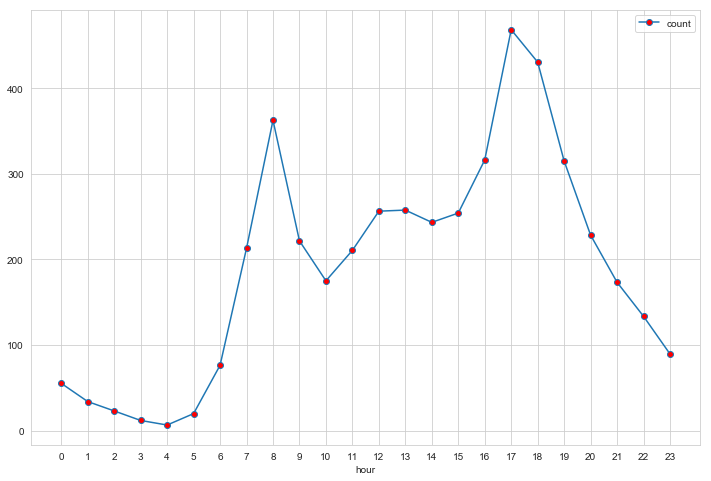

In [15]:
df_train[['hour','count']].groupby(by=['hour']).mean().\
plot(marker = 'o',markerfacecolor='red',figsize=(12,8),xticks=np.arange(0,24));

#### Holidays

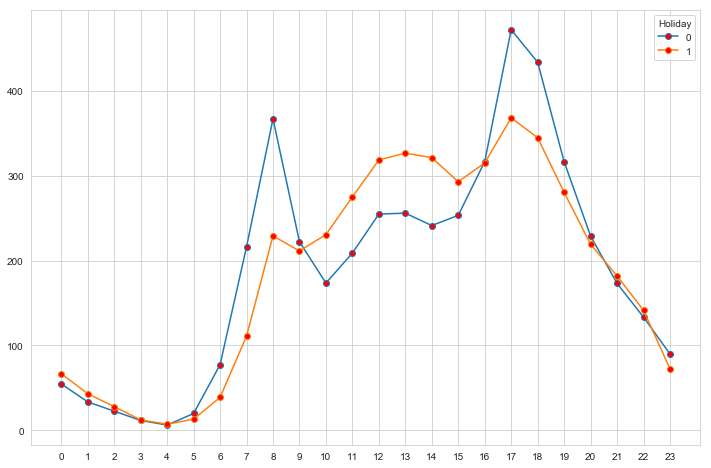

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df_train.loc[df_train['holiday']==0,['hour','count']].groupby(by=['hour']).mean(),\
         marker = 'o',markerfacecolor='red', label=0);
plt.plot(df_train.loc[df_train['holiday']==1,['hour','count']].groupby(by=['hour']).mean(),\
         marker = 'o',markerfacecolor='red', label=1);
plt.xticks(np.arange(0,24))
plt.legend(title='Holiday');

#### Influence of the seasons/months

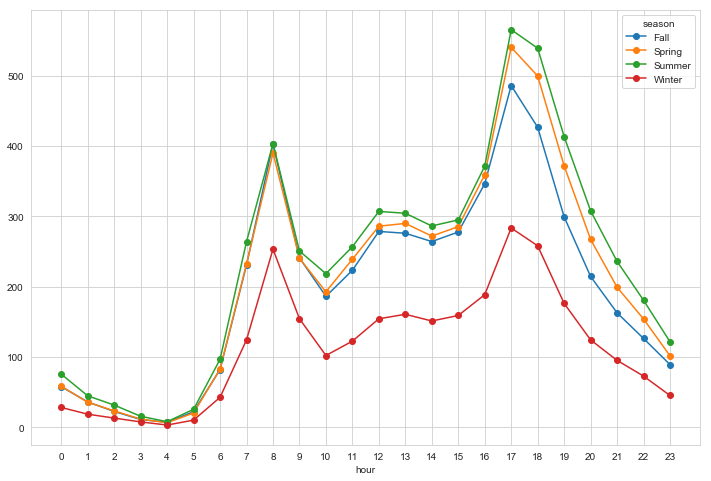

In [17]:
df_train[['hour','season','count']].\
groupby(by=['season','hour']).mean().pivot_table(index='hour',columns='season',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

/Users/Tim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


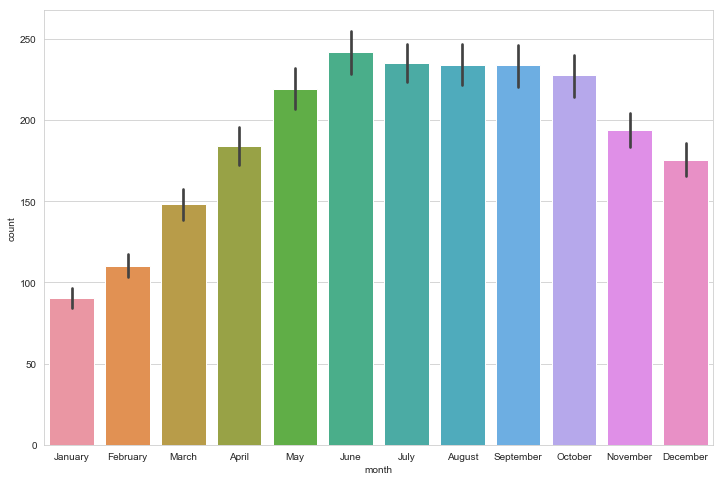

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='count',data=df_train);

#### Weekdays VS Weekend

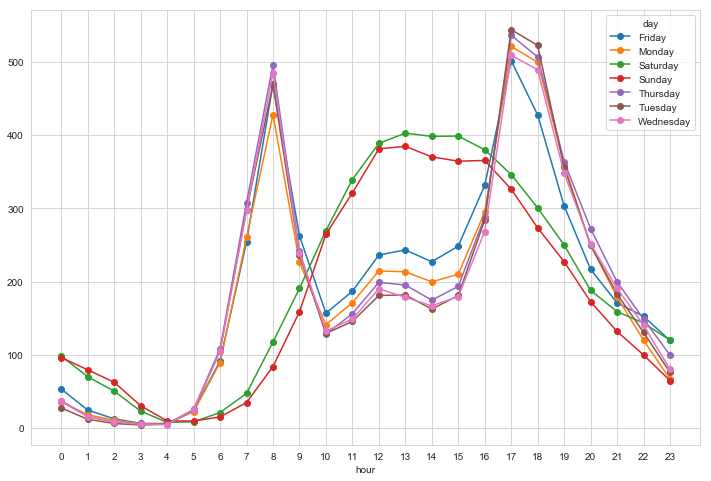

In [18]:
df_train[['hour','day','count']].\
groupby(by=['day','hour']).mean().pivot_table(index='hour',columns='day',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

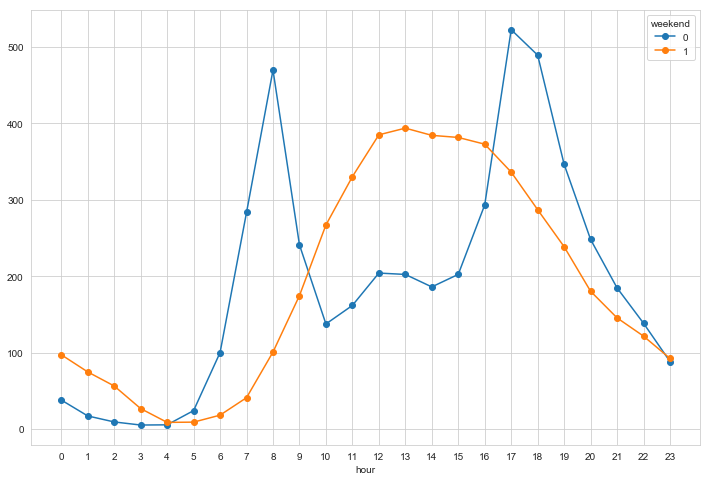

In [19]:
df_train[['hour','weekend','count']].\
groupby(by=['weekend','hour']).mean().pivot_table(index='hour',columns='weekend',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

#### Influence of the weather

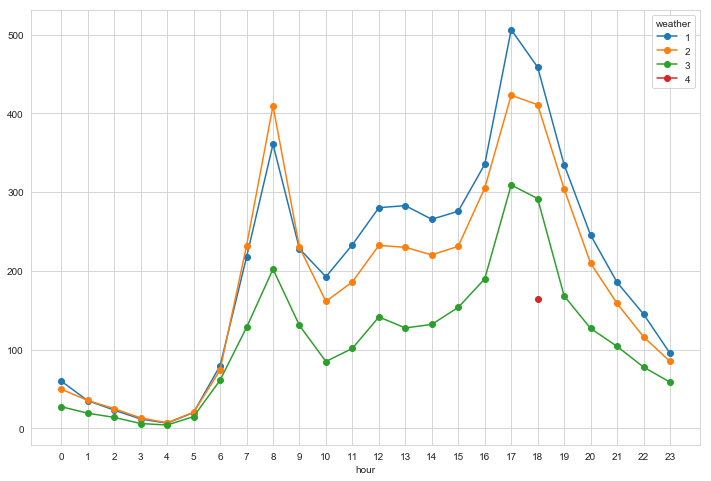

In [21]:
df_train[['hour','weather','count']].\
groupby(by=['weather','hour']).mean().pivot_table(index='hour',columns='weather',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

## Distribution analysis and detection of outliers

#### Removal of outliers

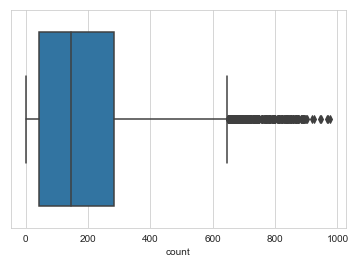

In [47]:
sns.boxplot(df_train['count']);

/Users/Tim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


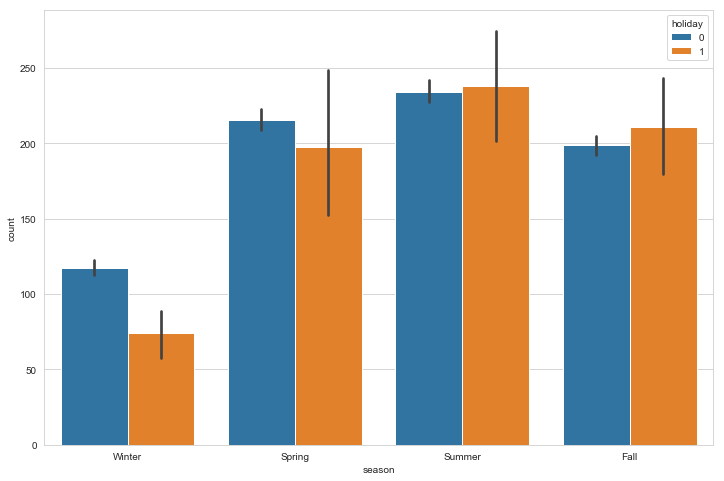

In [22]:
plt.figure(figsize=(12,8));
sns.barplot(x='season',y='count',hue='holiday', data=df_train);

#### Distributions of the continuous variables

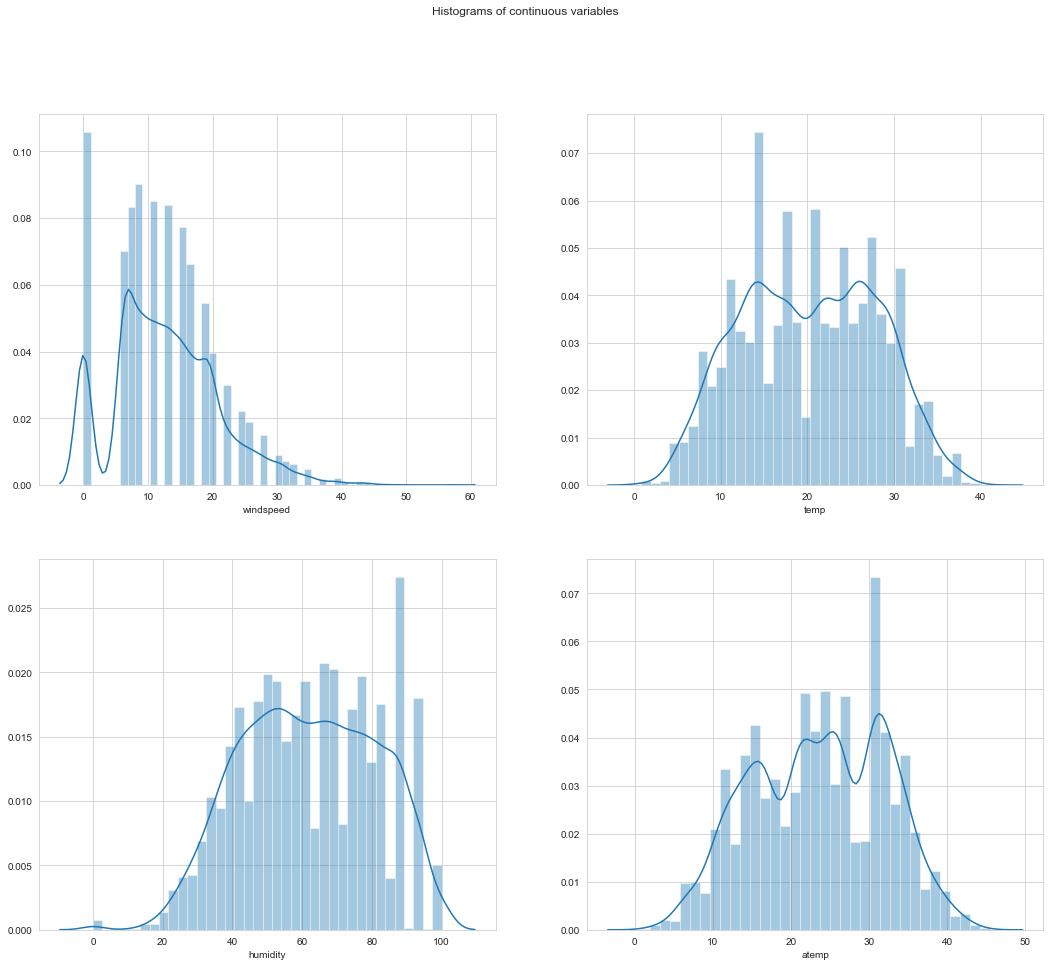

In [148]:
fig, axes = plt.subplots(2,2, figsize=(18,15))
sns.distplot(df_train['windspeed'], ax=axes[0,0])
sns.distplot(df_train['temp'], ax=axes[0,1])
sns.distplot(df_train['atemp'], ax=axes[1,1])
sns.distplot(df_train['humidity'], ax=axes[1,0])
plt.suptitle('Histograms of continuous variables');